In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [20]:
%run ../../src/matrix_functions.py

# $\mathcal{R}$ is a symbolic Riordan array

In [14]:
m = 10

d_fn, h_fn = Function('d'), Function('h')
d, h = IndexedBase('d'), IndexedBase('h')

d_series = define(let=d_fn(t), be=sum(d[i]*t**i for i in range(m))).subs({d[0]:1})
h_series = define(let=h_fn(t), be=t*sum(h[i]*t**i for i in range(m-1))).subs({h[0]:1}).expand()

d_series, h_series

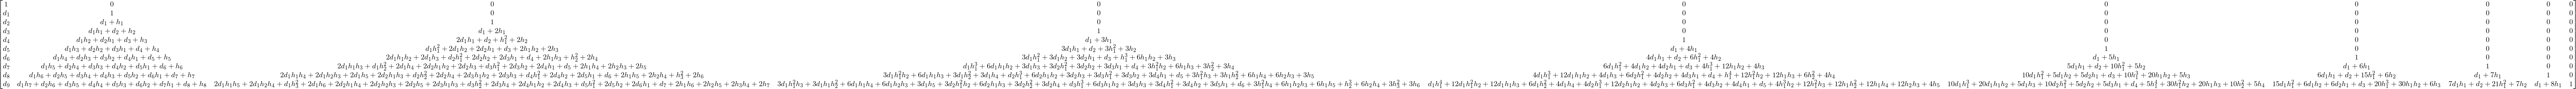

In [15]:
riordan = Matrix(m, m, riordan_matrix_by_convolution(d_series, h_series, t))
riordan

In [16]:
data, eigenvals, multiplicities = eigendata = eigen_data(riordan)
eigendata

In [17]:
m_bar = m
Phi_poly = Phi_poly_ctor(deg=m_bar-1)
Phi_poly

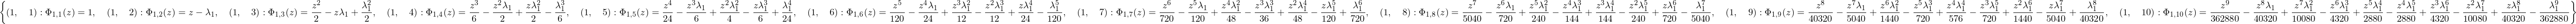

In [22]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

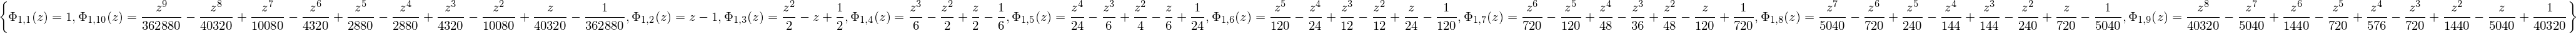

In [24]:
{v.subs(eigenvals) for k,v in Phi_polynomials.items()}

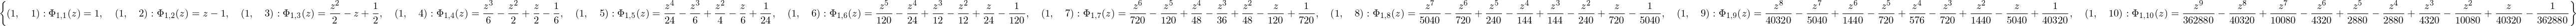

In [21]:
Phi_polynomials = component_polynomials_riordan(m_bar)
Phi_polynomials

have a look at [A098361][a] in the OEIS:

[a]:http://oeis.org/A098361

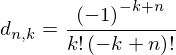

In [23]:
d = IndexedBase('d')
define(let=d[n,k], be=(-1)**(n-k)/(factorial(n-k)*factorial(k)))

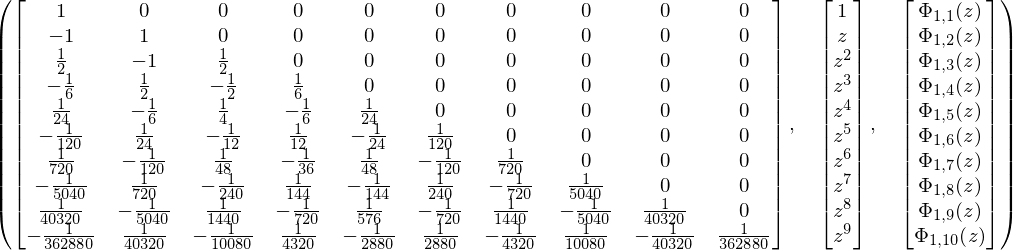

In [25]:
res_ordinary = M_ordinary, z_ordinary, Phi_ordinary = (
    Matrix(10, 10, lambda n,k: (-1)**(n-k)/(factorial(n-k)*factorial(k)) if n-k >= 0 else 0),
    Matrix([z**i for i in range(10)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, 11)]))

res_ordinary

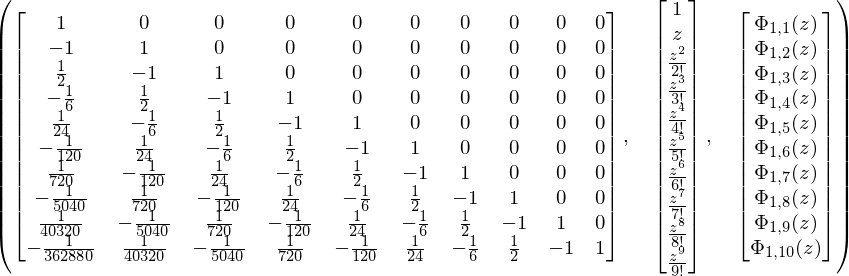

In [26]:
res_expt = M_expt, z_expt, Phi_expt =(
    Matrix(10, 10, lambda n,k: (-1)**(n-k)/(factorial(n-k)) if n-k >= 0 else 0),
    Matrix([z**i/factorial(i, evaluate=i<2) for i in range(10)]),
    Matrix([Function(r'\Phi_{{ {}, {} }}'.format(1, j))(z) for j in range(1, 11)]))

res_expt

In [27]:
Eq(M_ordinary*z_ordinary, M_expt*z_expt).simplify()

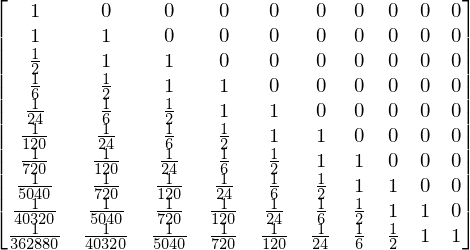

In [28]:
M_expt**(-1)

---

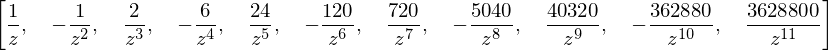

In [29]:
f_inverse = define(let=Function('f')(z), be=1/z)
[f_inverse.rhs.diff(z, i) for i in range(11)]

---

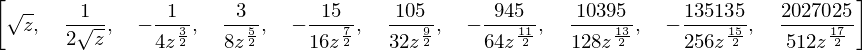

In [30]:
[sqrt(z).diff(z, j) for j in range(10)]

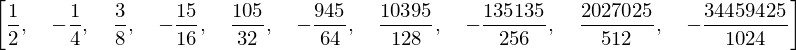

In [31]:
[(-1)**n*factorial(2*(n))/(factorial(n)*2**n)/2**(n+1) for n in range(10)]

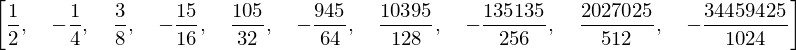

In [32]:
[(-1)**n*factorial(2*(n))/(factorial(n)*4**n)/2 for n in range(10)]

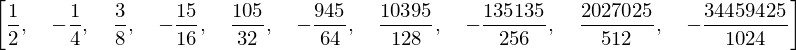

In [33]:
[(-1)**n*binomial(2*n, n)*factorial(n)/(2*4**n) for n in range(10)]

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.